In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

from IPython.display import Audio, display

# The Music and the Math
## (Mathematical Models Behind the Basic Scales and Chords)
### Table of Contents
- [Abstract](#Abstract)  
- [Introduction](#Introduction)
- [Sinusoid analysis](#Synusoid-analysis)
- [Music and perception](#Music-and-perception)
- [Scales](#Scales)  
- [Chords](#Chords)  
- [Testing](#Testing)
- [Conclusion](#Conclusion)  
- [References](#References)

## Abstract

This project is trying to present the basics of the main principles concerning the relationship between music and mathematics. It is a descriptive work which main focus is on the frequency characteristic of the notes, scales and chords and the relations between them.  
The [Introduction](#Introduction) part deals with the base concepts, discussed in more detail in the next two chapters - [Synusoid analysis](#Synusoid-analysis) and [Music and perception](#Music-and-perception). 
The application of the theoretical models is presented in the chapters [Scales](#Scales) and [Chords](#Chords).   
The paper does not claim to be exhaustive, its purpose is to propose some algorithms that would be suitable for describing and presenting the considered phenomena.

## Introduction

The project steps on the online lecture "Music by the Numbers: The Relationships between Maths and Music" by Yordan Darakchiev ([Darakchiev 2022](#Darakchiev-2022)). The first part presents the basic concepts in music theory that are used in the further analysis. 

### Why sine waves?

Sound could be described as vibrations of the air. As Dave Benson points out "when an object vibrates, it causes waves of increased and decreased pressure in the air. These waves are perceived by the ear as sound" ([Benson 2008:2](#Benson-2008)). He also claims the sound waves are longitudinal (the motions involved in the wave are in the same direction as the propagation in opposite to the transverse waves where they are up and down) and have four main attributes:

- ***amplitude*** - the size of the vibration, (perceived as ***loudness***)
- ***pitch*** - should at first be thought of as corresponding to ***frequency*** of vibration
- ***timbre*** - corresponds to the shape of the frequency ***spectrum*** of the sound
- ***duration*** - the ***length*** of time for which the note sounds

<div style="text-align: center;"><b><i>Attributes of sound</b></i></div>

| Physical  | Perceptual |
|-----------|------------|
| Amplitude | Loudness   |
| Frequency | Pitch      |
| Spectrum  | Timbre     |
| Duration  | Length     |

Therefore, as the sound is waves perceived by the ear, the most convenient way to represent it should be a smooth periodic function such as sinusoid (sine wave, sinusoidal wave) - a mathematical curve defined in terms of the sine trigonometric function. It is also possible to use a cosine wave - it is "also said to be sinusoidal, because $ \cos(x)=\sin(x+\frac {\pi} {2}) $, which is also a sine wave with a phase-shift of $ \frac {\pi} {2} $ radians. Because of this head start, it is often said that the cosine function leads the sine function or the sine lags the cosine. The term sinusoidal thereby collectively refers to both sine waves and cosine waves with any phase offset." ([Wikipedia](#Wikipedia-1)).  
The sine function could be presented like this:

$$ x(t) = \sin(t) $$



### Elements of a sinusoid

#### Frequency
It is possible to represent the sine function as a graphic if we pick a temporal interval $ t $ (5s in the example below - it could be, of course, another unit of measure but for the purpose of this project the second works just fine, and also the frequency is measured in Hz - vibrations per second), take enough points between the start and the and point (5000 in this case) and define $ x $ according to the above formula:

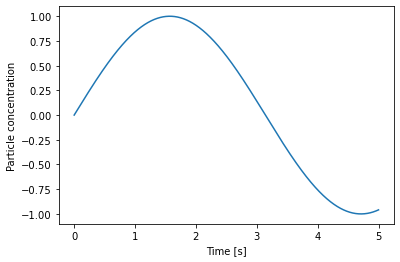

In [3]:
t = np.linspace(0, 5, 5000)
x = np.sin(t)

plt.xlabel("Time [s]")
plt.ylabel("Particle concentration")

plt.plot(t, x)
plt.show()

The horizontal axis represents the time and the vertical - the concentration of particles in the air at particular moment.  
<img src="CPT-sound-physical-manifestation.svg" width=600>    
([note<sup>1</sup>](#note-1))  
If we want to name the vertical axis in a more abstract way, we could use the standard term for offset from the center - "amplitude" (it will be labeled like this further in the article).  
As can be seen from the previous graph, the sine of 0 to 5 is not a whole period of the function. If we want to show a full period we should set the time interval to $ 2 \pi $:

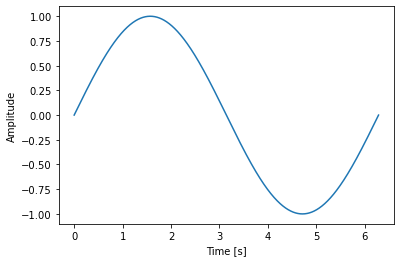

In [4]:
t = np.linspace(0, 2* np.pi, 5000)
x = np.sin(t)

plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.plot(t, x)
plt.show()

The sinusoid is periodic, as we can see at the following graphic if we multiply $ 2 \pi $ by random integer (for example 5)[<sup>2</sup>](#note-2):

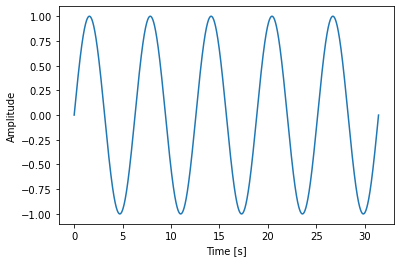

In [5]:
t = np.linspace(0, 5 * 2 * np.pi, 5000)
x = np.sin(t)

plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.plot(t, x)
plt.show()

If we want to represent vibrations per second [i.e. in Hz] we should set the values of $ t $ to be between 0 and 1. Then $ \sin (2 \pi t) $ will give one full period of the function in that time interval (1s): 

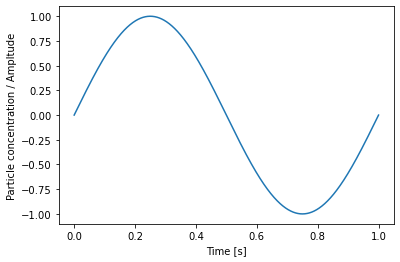

In [6]:
t = np.linspace(0, 1, 5000)
x = np.sin(2 * np.pi * t)

plt.plot(t, x)

plt.xlabel("Time [s]")
plt.ylabel("Particle concentration / Ampltude")

plt.show()

Now, to get $ n $ vibrations per second, we should multiply $ 2 \pi t  $ by $ n $:

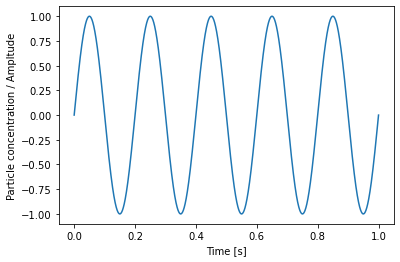

In [7]:
t = np.linspace(0, 1, 5000)
x = np.sin(5 * 2 * np.pi * t)

plt.plot(t, x)

plt.xlabel("Time [s]")
plt.ylabel("Particle concentration / Ampltude")

plt.show()

#### Amplitude

It was already said that amplitude is the physical characteristics perceived as loudness. The bigger it is, the louder we hear the sound. 

#### Initial phase (initial value)

The initial phase is a value of the function if t is equal to 0. It is measured usually in radians. If we change its value the function starts from a different point.

(A demonstration of the amplitude and the initial phase behavior will be shown in the next chapter, after the main functions are defined.)

## Sinusoid analysis

After the main components of the sinusoid are pointed out, we could generalize the main formula that is gonna be used in the analysis:

$$ x(t) = A\sin(2\pi f t + \varphi) $$

$A$ - amplitude

$f$ - linear frequency (1 per second) [Hz]

$\varphi$ - initial phase [rad]

$2\pi f$ - angle frequency (usually marked as $\omega$)

The first step is to define two constants that will be used everywhere for sine waves generation and plot:

In [8]:
SAMPLING_RATE = 16000 # increase for frequencies over A5 (880 Hz), 192000 recommended
BASE_FREQ = 440  # 440.00 Hz (Stuttgart pitch), which serves as a tuning standard for the musical note of A

Next, the main function that generates the sinusoid (based on the formula above) can be presented:

In [9]:
def generate_sinusoid(frequency, amplitude = 1, initial_phase = 0, end_time = 1):
    t = np.linspace(0, end_time, int(SAMPLING_RATE*end_time))
    x = amplitude * np.sin(frequency * 2 * np.pi * t + initial_phase)
    return (t, x, frequency)

Now we can generate the sine waves array, where $t$ contains (SAMPLE_RATES * end_time) points in the time interval from 0 to end_time and $x$ are the corresponding values of the sound wave for every temporal point in $t$, e.g.:

In [10]:
sin_10 = generate_sinusoid(10)
sin_10

(array([0.00000000e+00, 6.25039065e-05, 1.25007813e-04, ...,
        9.99874992e-01, 9.99937496e-01, 1.00000000e+00]),
 array([ 0.00000000e+00,  3.92722617e-03,  7.85439178e-03, ...,
        -7.85439178e-03, -3.92722617e-03, -2.44929360e-15]),
 10)

Here is the plot function that get the generated values and represents the corresponding sine waves:

In [11]:
def plot_sinusoid(values, show_plot=True, label=None, title=None):

    plt.xlabel("Time [s]")
    plt.ylabel("Ampltude")

    t, x, freq = values

    if title:
        plt.title(title)

    plt.plot(t, x, label=label if label else f"{freq:0.2f} Hz")
    plt.legend(loc="upper right")
    if show_plot:
        fig = plt.gcf()
        fig.set_size_inches(15, 4.8)
        plt.show()

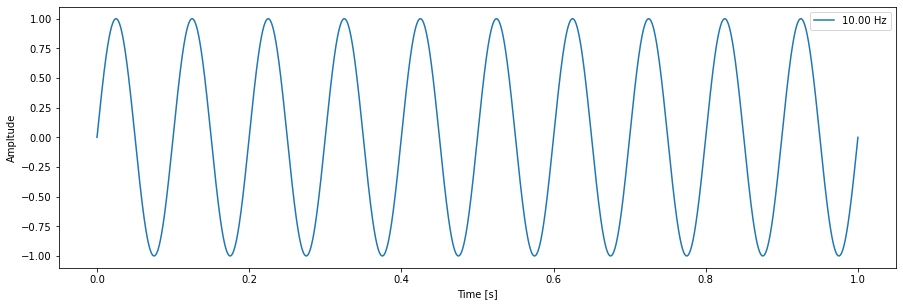

In [12]:
plot_sinusoid(sin_10)

The next function gives the opportunity to see a sinusoid of a frequency in a particular time interval by choosing values from 0.001 to 1 s, which is enough for the pitches the human ear can hear:

In [13]:
def display_frequency_sinusoid(current_freq):
    @widgets.interact(
        end_time=widgets.FloatSlider(value=0.5, min=0.001, max=1, step=0.001)
    )
    def update(end_time):
        print(f"Visible time interval: {end_time} s")
        plot_sinusoid(generate_sinusoid(current_freq, 1, 0, end_time))
        display(
            Audio(
                generate_sinusoid(current_freq, 1, 0, end_time=1)[1], rate=SAMPLING_RATE
            )
        )

In [14]:
display_frequency_sinusoid(440)

interactive(children=(FloatSlider(value=0.5, description='end_time', max=1.0, min=0.001, step=0.001), Output()…

Now, as we already have the functions that generate and plot the sine waves, let's go back to the demonstration of the behavior of the parameters $A$ and $\varphi$.   
Here we have two waves with the same frequency, but they have different amplitude: 

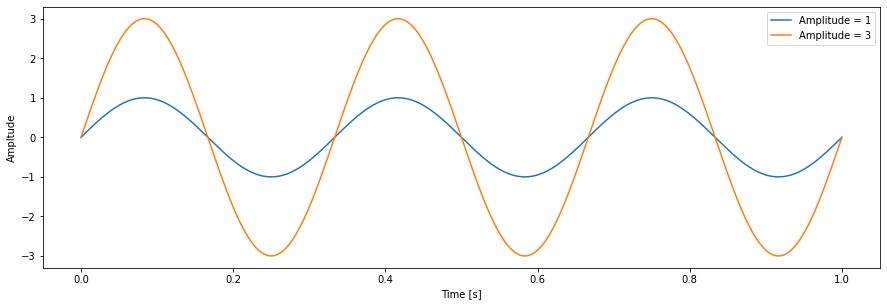

In [15]:
plot_sinusoid(generate_sinusoid(3, 1), label = 'Amplitude = 1', show_plot = False)
plot_sinusoid(generate_sinusoid(3, 3), label = 'Amplitude = 3')

And here are the sinusoid of two waves with the same frequency and the same amplitude, but the one is with initial phase 0, and the other - with $\varphi = 2 \pi$:

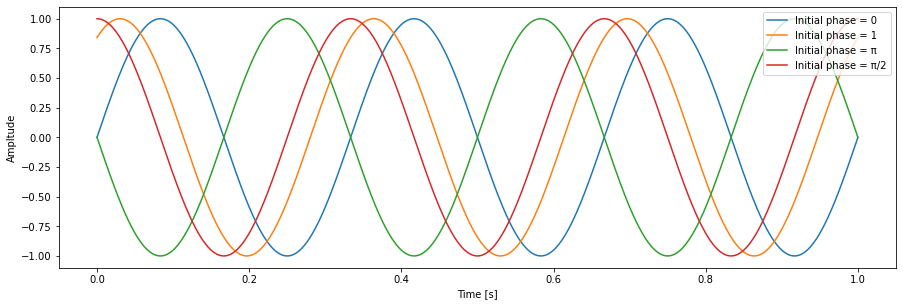

In [16]:
plot_sinusoid(generate_sinusoid(3, initial_phase = 0), label = 'Initial phase = 0',  show_plot = False)
plot_sinusoid(generate_sinusoid(3, initial_phase = 1), label = 'Initial phase = 1',  show_plot = False)
plot_sinusoid(generate_sinusoid(3, initial_phase = np.pi), label = 'Initial phase = π', show_plot=False)
plot_sinusoid(generate_sinusoid(3, initial_phase = np.pi/2), label = 'Initial phase = π/2')

## Music and perception

#### It's all relative! <img src='./Einstein.svg' width=50></img>[<sup>1</sup>](#note-1) 

Linear and logarithmic magnification: the amplitude is measured in decibels, but to get a linear sensation, it is necessary to increase the amplitude several times. That question will be presented in details in the next chapter.
    
When two or more sounds of different frequencies overlap, their action is combined. This combination is called superposition (or the principle of superposition - superposition means overlay). The amplitude in some places increases and in others decreases - the resulting function is also periodic:

In [17]:
t, freq_5, f_5 = generate_sinusoid(5)
t, freq_10, f_10 = generate_sinusoid(10)

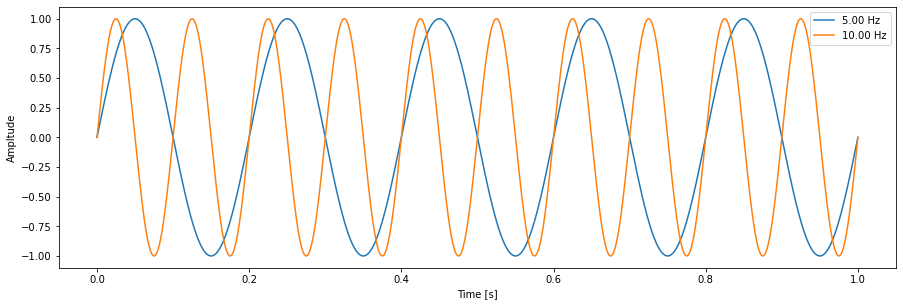

In [18]:
plot_sinusoid((t, freq_5, f_5),  show_plot = False)
plot_sinusoid((t, freq_10, f_10))

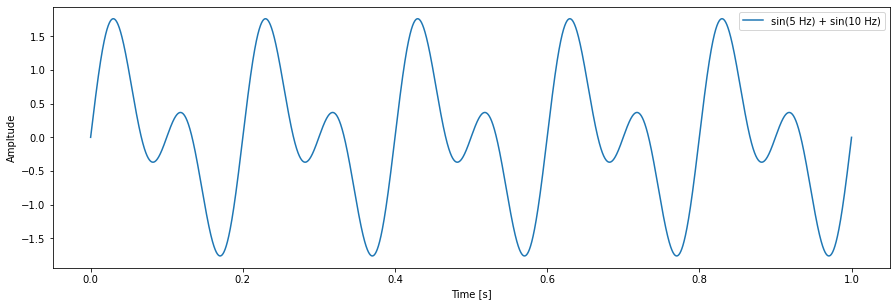

In [19]:
plot_sinusoid((t, freq_5 + freq_10, f_5), label=f'sin({f_5} Hz) + sin({f_10} Hz)')

### Timbre

In music, timbre, also known as tone color or tone quality (from psychoacoustics), is the perceived sound quality of a musical note, sound or tone. Timbre distinguishes different types of sound production, such as choir voices and musical instruments. It also enables listeners to distinguish different instruments in the same category (e.g., an oboe and a clarinet, both woodwind instruments).   
In simple terms, timbre is what makes a particular musical instrument or human voice have a different sound from another, even when they play or sing the same note. For instance, it is the difference in sound between a guitar and a piano playing the same note at the same volume. Both instruments can sound equally tuned in relation to each other as they play the same note, and while playing at the same amplitude level each instrument will still sound distinctively with its own unique tone color. Experienced musicians are able to distinguish between different instruments of the same type based on their varied timbres, even if those instruments are playing notes at the same fundamental pitch and loudness.    
The richness of a sound or note a musical instrument produces is sometimes described in terms of a sum of a number of distinct frequencies. The lowest frequency is called the fundamental frequency, and the pitch it produces is used to name the note, but the fundamental frequency is not always the dominant frequency. The dominant frequency is the frequency that is most heard, and it is always a multiple of the fundamental frequency. For example, the dominant frequency for the transverse flute is double the fundamental frequency. Other significant frequencies are called overtones of the fundamental frequency, which may include harmonics and partials. Harmonics are whole number multiples of the fundamental frequency, such as ×2, ×3, ×4, etc. ([Wikipedia](#Wikipedia-9))

Here is a demonstration with the note A3 a base tone and A4 and A3 (with lower amplitude) as harmonics:

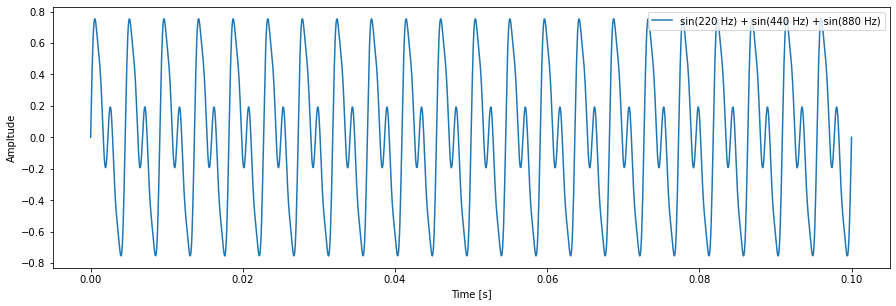

In [20]:
t, freq_220, f_220 = generate_sinusoid(220, amplitude = 0.5, end_time=0.1)
t, freq_440, f_440 = generate_sinusoid(440, amplitude = 0.4, end_time=0.1)
t, freq_880, f_880 = generate_sinusoid(880, amplitude = 0.1, end_time=0.1)
freq_sum = freq_220 + freq_440 + freq_880
plot_sinusoid((t, freq_sum, f_220), label=f'sin({f_220} Hz) + sin({f_440} Hz) + sin({f_880} Hz)')

In [21]:
Audio(generate_sinusoid(220, amplitude = 0.5, end_time=2)[1] 
      + generate_sinusoid(440, amplitude = 0.4, end_time=2)[1] 
      + generate_sinusoid(880, amplitude = 0.1, end_time=2)[1],
      rate = SAMPLING_RATE)

The next plot presents the same frequencies, but this time the amplitude of the second and the third pitch are switched, i.e. it is the same note (A) with a different timbre:

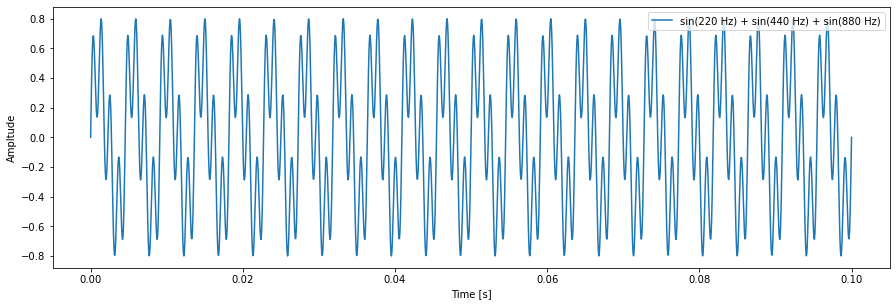

In [22]:
t, freq_220, f_220 = generate_sinusoid(220, amplitude = 0.5, end_time=0.1)
t, freq_440, f_440 = generate_sinusoid(440, amplitude = 0.1, end_time=0.1)
t, freq_880, f_880 = generate_sinusoid(880, amplitude = 0.4, end_time=0.1)
freq_sum = freq_220 + freq_440 + freq_880
plot_sinusoid((t, freq_sum, 1), label=f'sin({f_220} Hz) + sin({f_440} Hz) + sin({f_880} Hz)')

In [23]:
Audio(generate_sinusoid(220, amplitude = 0.5, end_time=2)[1] 
      + generate_sinusoid(440, amplitude = 0.1, end_time=2)[1] 
      + generate_sinusoid(880, amplitude = 0.4, end_time=2)[1],
      rate = SAMPLING_RATE)

## Scales

The modern Western music is based on the so-called *twelve-tone equal temperamen* - musical system that divides the octave into 12 parts, all of which are equally tempered (equally spaced) on a logarithmic scale ([Wikipedia](#Wikipedia-2)). As a base note is accepted by convention the note A in fourth octave (A4) with frequency 440.00 Hz.

The following cell defines a dictionary containing all the notes - the names and their offset according to A.

In [24]:
notes_map = {
    # For convenience all ♭-chords should be written as the corresponding #-chord.
    'A':  0,
    'A#': 1,  # B♭
    'B':  2,
    'C':  3,
    'C#': 4,  # D♭
    'D':  5,
    'D#': 6,  # E♭
    'E':  7,
    'F':  8,
    'F#': 9,  # G♭
    'G': 10,
    'G#': 11  # A♭
}

The next function will be used to get every note's frequency by its name. It is need for further analysis and for the chords generators, presented in the next chapter.

In [25]:
def freq_from_note(name, octave):
    if name in notes_map:
        # As fourth octave is accepted as a base and the first pitch in an octave is not A, but C the base offset should be normalised:
        base_offset = octave - 4 if notes_map[name] < 3 else octave - 5
        # After that the absolute offset of the note from the BASE_FREQ is calculated (in half-notes steps):
        offset = base_offset * 12 + notes_map[name]
        name_as_num = notes_map[name]
        return np.around(BASE_FREQ * 2 ** (offset / 12), decimals=2)

The mathematical formula used in the function is:  
$$ f = n\cdot2^{N/12} $$
$ f $ - frequency  
$ n $ - base note  
$ N $ - the offset (distance) form the base note ($ n $)

In this case the base ($ n $) is A4 (A in forth octave - 440 Hz).

The explanation for that relation lies in the logarithmic essence of the notes frequency distribution. It means the intervals between pitches are not equal. The human ear perceives the frequency $ f $ in almost the same way as the frequency $ 2 f $. If we take the note A in three adjacent octaves, we will see that the frequency of the higher note is exactly twice the one of the lower.

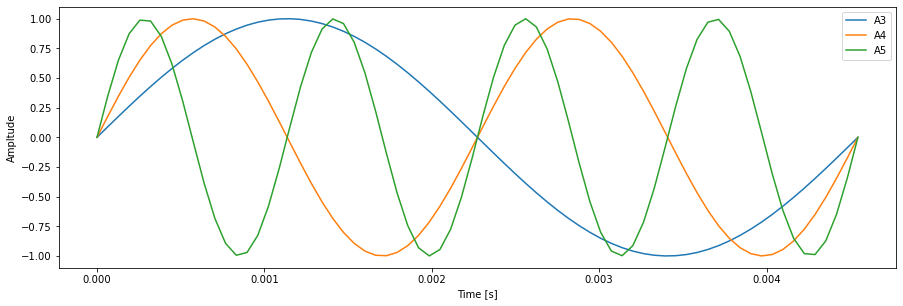

In [26]:
plot_sinusoid(generate_sinusoid(220, end_time= 1/220), show_plot=False, label="A3")
plot_sinusoid(generate_sinusoid(440, end_time= 1/220), show_plot=False, label="A4")
plot_sinusoid(generate_sinusoid(880, end_time= 1/220),  label="A5")

So the octave (i.e. one full cycle of the pitches from the base to the next one that sounds almost the same) is exactly $ 2 f $. To demonstrate this let's first get all the notes frequencies from the first to the eighth octave.

In [27]:
octave_base = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

notes_freq = [freq_from_note(x, i) for i in range(9) for x in octave_base]

Now we can plot a graphic showing the relation between the notes and the frequency:

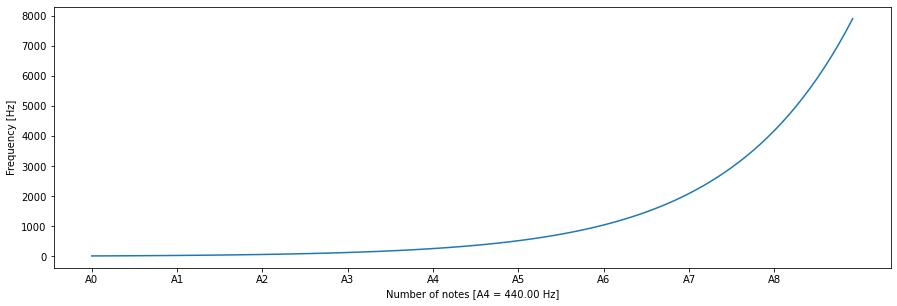

In [28]:
y = np.linspace(0, 10000, 108)
plt.xlabel("Number of notes [A4 = 440.00 Hz]")
plt.ylabel("Frequency [Hz]")

plt.xticks(
    ticks=range(0, len(notes_freq), 12),
    labels=[
        f"{octave_base[i % 12 + 9]}{i // 12}" for i in range(0, len(notes_freq), 12)
    ],
)
plt.yticks(ticks= range(0, 10000, 1000), labels=range(0, 10000, 1000))
plt.plot(notes_freq)
fig = plt.gcf()
fig.set_size_inches(15, 4.8)
plt.show()

As we can see the higher the notes become, the faster the frequency rises, therefore the intervals between the notes are getting shorter. 
The same dependence can be expressed by the so-called logarithmic diagram:

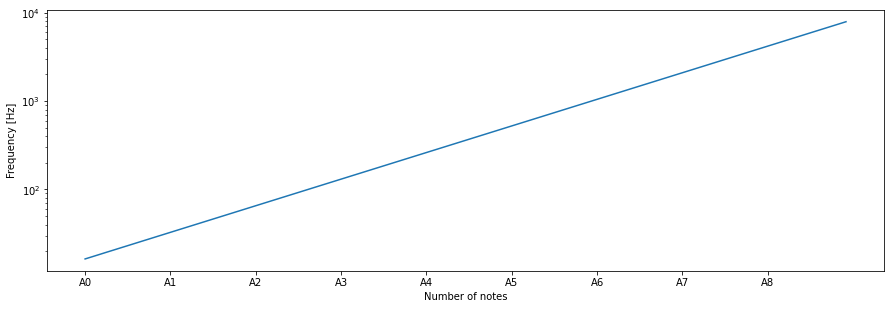

In [29]:
plt.xlabel("Number of notes")
plt.ylabel("Frequency [Hz]")

plt.xticks(ticks= range(0, len(notes_freq), 12), 
           labels = [f'{octave_base[i % 12 + 9]}{i // 12}' for i in range(0, len(notes_freq), 12)])

plt.yscale("log")

plt.plot(notes_freq)
fig = plt.gcf()
fig.set_size_inches(15, 4.8)
plt.show()

And may be the best proof for that from the real life is the guitar fretboard:  
<img src="./Guitar_Fretboard.png"></img>  

In music theory, a scale is any set of musical notes ordered by fundamental frequency or pitch. Due to the principle of octave equivalence, scales are generally considered to span a single octave, with higher or lower octaves simply repeating the pattern. A musical scale represents a division of the octave space into a certain number of scale steps, a scale step being the recognizable distance (or interval) between two successive notes of the scale. A measure of the width of each scale step provides a method to classify scales. For instance, in a chromatic scale each scale step represents a semitone interval, while a major scale is defined by the interval pattern W–W–H–W–W–W–H, where W stands for whole step (an interval spanning two semitones, e.g. from C to D), and H stands for half-step (e.g. from C to D♭). Based on their interval patterns, scales are put into categories including diatonic, chromatic, major, minor, and others. ([Wikipedia](#Wikipedia-3))

Here will be presented only the two main scales used in the contemporary pop and rock - the major and the minor scales. It was already pointed out that the main interval is the octave, where the relation between two pitches is $ \frac{2}{1} $. The second pivot in the modern music is the perfect fifth - interval with ratio $ \frac{3}{2} $ (well known as the "golden ratio"). The sine wave of the perfect fifth compared to the base pitch would look like this:

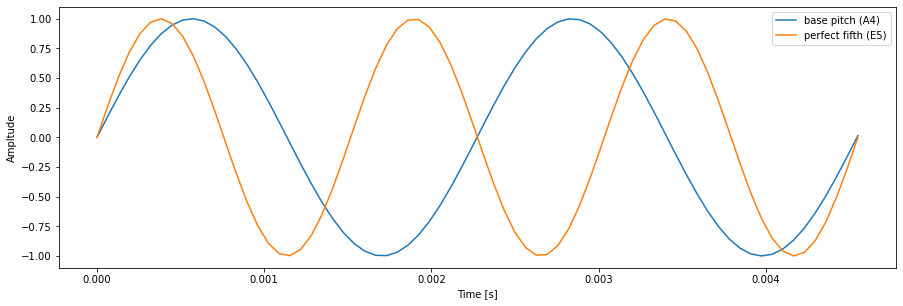

In [30]:
plot_sinusoid(generate_sinusoid(freq_from_note("A", 4), end_time= 1/freq_from_note("E", 5) * 3),
              show_plot = False, label = "base pitch (A4)")
plot_sinusoid(generate_sinusoid(freq_from_note("E", 5), end_time= 1 / freq_from_note("E", 5) * 3),
              label = "perfect fifth (E5)")

### Circle of fifths

In music theory, the circle of fifths is a way of organizing the 12 chromatic pitches as a sequence of perfect fifths. If C is chosen as a starting point, the sequence is: C, G, D, A, E, B (=C♭), F♯ (=G♭), C♯ (=D♭), A♭, E♭, B♭, F. Continuing the pattern from F returns the sequence to its starting point of C. This order places the most closely related key signatures adjacent to one another. It is usually illustrated in the form of a circle. A perfect fifth consists of two pitches with a frequency ratio of 3:2, but generating a twelve perfect fifths in this way does not result in a return to the pitch class of the starting note. To adjust for this, instruments are generally tuned with the equal temperament system. Twelve equal-temperament fifths lead to a note exactly seven octaves above the initial tone—this results in a perfect fifth that is equivalent to seven equal-temperament semitones. ([Wikipedia](#Wikipedia-4))  
<img src="Circle_of_fifths.svg" width=400/>  

([note<sup>3</sup>](#note-3))  

### The major scale

The major scale (or Ionian mode) is one of the most commonly used musical scales, especially in Western music. It is one of the diatonic scales. Like many musical scales, it is made up of seven notes: the eighth duplicates the first at double its frequency so that it is called a higher octave of the same note (from Latin "octavus", the eighth). The scale degrees are:
- 1st: Tonic
- 2nd: Supertonic
- 3rd: Mediant
- 4th: Subdominant
- 5th: Dominant
- 6th: Submediant
- 7th: Leading tone
- 8th: Tonic  

([Wikipedia](#Wikipedia-5))

In [31]:
def generate_scale(name, octave = 4, major = True):
    base = freq_from_note(name, octave)
    if not base:
        return f'"{name}" is not a valid scale name!'
    notes = [0, 2, 3, 5, 7, 8, 10, 12]
    if major:
        notes = [0, 2, 4, 5, 7, 9, 11, 12]

    return [np.around(base * 2 ** (x / 12), decimals=2) for x in notes], name, major

In [32]:
generate_scale("C")

([261.63, 293.67, 329.63, 349.23, 392.0, 440.01, 493.89, 523.26], 'C', True)

In [33]:
def plot_scale(scale):
    (notes, key, major) = scale
    
    #Slider for end_time parameter
    @widgets.interact(time = widgets.FloatSlider(value=0.005, min=0.001, max=.1, step=0.001))
    def update(time):
        print(f"Visible time interval: {time} s")

        audio = [] # container for the generated audio for every note

        frequences = np.array([]) #container for the sine waves of every chord frequency
                
        # loop through every note and plot its sinusoid
        for i, note in enumerate(notes):
            sin = generate_sinusoid(note, 1, end_time = time)
            frequences = np.append(frequences, generate_sinusoid(note, 1, end_time = 0.5)[1])
            if i == len(notes) - 1:
                plot_sinusoid(sin, label = f"note {i + 1} [{note:.2f}]", title = key if major else f"{key}m")
            else:
                plot_sinusoid(sin, label = f"note {i + 1} [{note:.2f}]", show_plot = False)  

        audio.append((key, Audio(frequences, rate = SAMPLING_RATE))) 

        [display(x[1]) for x in audio]

In [34]:
plot_scale(generate_scale("A"))

interactive(children=(FloatSlider(value=0.005, description='time', max=0.1, min=0.001, step=0.001), Output()),…

### Natural minor scale

A natural minor scale (or Aeolian mode) is a diatonic scale that is built by starting on the sixth degree of its relative major scale. For instance, the A natural minor scale can be built by starting on the 6th degree of the C major scale. Because of this, the key of A minor is called the **relative minor** of C major. Every major key has a relative minor, which starts on the 6th scale degree or step. For instance, since the 6th degree of A major is F#, the relative minor of A major is F# minor. ([Wikipedia](#Wikipedia-6))

In [35]:
plot_scale(generate_scale("F#", major = False))

interactive(children=(FloatSlider(value=0.005, description='time', max=0.1, min=0.001, step=0.001), Output()),…

If we compare the last two graphics we will notice they contain the same pitches, only the starting point is different.

A natural minor scale can also be constructed by altering a major scale with accidentals. In this way, a natural minor scale is represented by the following notation:  
1, 2, ♭3, 4, 5, ♭6, ♭7, 8  
Each degree of the scale, starting with the tonic (the first, lowest note of the scale), is represented by a number. Their difference from the major scale is shown. Thus, a number without a flat represents a major (or perfect) interval. A number with a flat represents a minor interval. In this example, the numbers mean:
- 1 = (perfect) unison
- 2 = major second
- ♭3 = minor third
- 4 = perfect fourth
- 5 = perfect fifth
- ♭6 = minor sixth
- ♭7 = minor seventh
- 8 = (perfect) octave   

Thus, for instance, the A natural minor scale can be built by lowering the third, sixth, and seventh degrees of the A major scale by one semitone. Because of this, the key of A minor is called the **parallel minor** of A major. ([Wikipedia](#Wikipedia-6))

In [36]:
plot_scale(generate_scale("A", major = False))

interactive(children=(FloatSlider(value=0.005, description='time', max=0.1, min=0.001, step=0.001), Output()),…

One of the most used scales in the last century are the pentatonic and the blues scales, but they deserve a separate study and won't be presented here. Nevertheless the functions above can be easily adjusted to work with every scale.

## Chords

In music theory, a **major chord** is a chord that has a root, a major third, and a perfect fifth. When a chord has these three particular notes, it is called a major triad. For example, the major triad built on C, called a C major triad, has pitches C–E–G. A **minor chord** is a chord that has a root, a minor third, and a perfect fifth. When a chord has these three notes alone, it is called a minor triad. For example, the minor triad built on C, called a C minor triad, has pitches C–E♭–G. ([Wikipedia](#Wikipedia-7))

The next function allows to be generated any major or minor triad in any octave and returns its notes frequencies:

In [37]:
def generate_chord(name, octave = 4, major = True):
    base = freq_from_note(name, octave)
    if not base:
        return f'"{name}" is not a valid chord name!'
    second = 4 if major else 3
    second_note = np.around(base * 2 ** (second / 12), decimals=2)
    third_note = np.around(base * 2 ** (7 / 12), decimals=2)
    return {f"{name}{'' if major else 'm'}": (base, second_note, third_note)}

In [38]:
generate_chord("C")

{'C': (261.63, 329.63, 392.0)}

In [39]:
generate_chord("C", major = False)

{'Cm': (261.63, 311.13, 392.0)}

To see the sine waves of a chord and to be able to compare their values, we need a function that can plot them:

In [40]:
def plot_chord_separate_sines(*chords):
    
    #Slider for end_time parameter
    @widgets.interact(time = widgets.FloatSlider(value=0.01, min=0.001, max=.1, step=0.001))
    def update(time):
        print(f"Visible time interval: {time} s")

        keys = []
        audio = [] # container for the generated audio for every chord
        for i, chord in enumerate(chords):
            
            # Return error message if the function is not properly called
            if not type(chord) == dict:
                return print(f'Please, give the chord name as a parameter of generate_chord')
            
            #Loop through the chords
            for key in chord:
                keys.append(key)
                
                # Return error message if the chord name is incorrect
                if not key in keys:
                    return f'"{key}" is not a valid chord name!'
                
                chord_notes = chord[key]
                frequences = np.array([]) #container for the sine waves of every chord frequency
                
                # loop through every note and plot its sinusoid
                for j, note_freq in enumerate(chord_notes):
                    sin = generate_sinusoid(note_freq, 1, end_time = time)
                    frequences = np.append(frequences, generate_sinusoid(note_freq, 1, end_time = 0.5)[1])
                    if j == len(chord_notes) - 1 and i == len(chords) - 1:
                        plot_sinusoid(sin, label = f"{key}: note {j + 1} [{note_freq:.2f}]", title = ', '.join(keys))
                    else:
                        plot_sinusoid(sin, show_plot = False, label = f"{key}: note {j + 1} [{note_freq:.2f}]")  
                        
                audio.append((key, chord_notes, Audio(frequences, rate = SAMPLING_RATE))) 
                
        [(print(f'Chord: {x[0]} [frequences: {", ".join(str(y) for y in x[1])}]:'), display(x[2])) for x in audio]

Here is the graphic showing the three sine waves of the A (major) chord:

In [41]:
plot_chord_separate_sines(generate_chord('A'))

interactive(children=(FloatSlider(value=0.01, description='time', max=0.1, min=0.001, step=0.001), Output()), …

And that's the separate sinusoids of the Am (minor) chord:

In [42]:
plot_chord_separate_sines(generate_chord('A', major = False))

interactive(children=(FloatSlider(value=0.01, description='time', max=0.1, min=0.001, step=0.001), Output()), …

We can easily notice that the only difference is the second pitch. That's much more clear if we plot them together:

In [43]:
plot_chord_separate_sines(generate_chord("A"), generate_chord("A", major=False))

interactive(children=(FloatSlider(value=0.01, description='time', max=0.1, min=0.001, step=0.001), Output()), …

The first and the last pitch of the major and the corresponding (based on the parallel minor scale) minor chord overlaps, only the second pitch is different.   
That way we can see and hear the separate notes composing the chord, but usually that notes sound together and the human ear accepts them as a whole. That's why we need a function that processes the chords in this way:

In [44]:
def plot_chord_combined_sines(*chords):
    
    @widgets.interact(time = widgets.FloatSlider(value=1, min=0.01, max=2, step=0.01))
    def update(time):
        print(f"Visible time interval: {time} s")
        keys = []
    
        for chord in chords:
            if not type(chord) == dict:
                return print(f'Please, give the chord name as a parameter of generate_chord')
        
            for key in chord:
                keys.append(key)
                chord_notes = chord[key]
                frequences = []
                
                for note_freq in chord_notes:
                    t, freq, f = generate_sinusoid(note_freq, end_time = time)
                    frequences.append(freq)
                    
                plot_sinusoid((t, sum(frequences), f), title = key, label=' + '.join(f'{i:.2f}' for i in chord_notes))
                display(Audio(sum(frequences), rate = SAMPLING_RATE))

Here are the graphics presenting the same chords when the notes sound together:

In [45]:
plot_chord_combined_sines(generate_chord('A'), generate_chord('A', major=False))

interactive(children=(FloatSlider(value=1.0, description='time', max=2.0, min=0.01, step=0.01), Output()), _do…

If the time interval slider is set to low value we see a very detailed picture, but the pattern demonstrating the difference between a minor and a major chord works best at values between 0.3 and 1 for that particular frequencies (it will be different if we test it with other chords and other octaves, of course - that's where the time slider comes in handy).

## Testing

At the end we have some little tests of the code verifying that it works as it should and giving a proper feedback when a wrong input is submitted.

In [46]:
plot_chord_combined_sines('A')

interactive(children=(FloatSlider(value=1.0, description='time', max=2.0, min=0.01, step=0.01), Output()), _do…

In [47]:
plot_chord_separate_sines("A")

interactive(children=(FloatSlider(value=0.01, description='time', max=0.1, min=0.001, step=0.001), Output()), …

## Conclusion  
The project tried to describe some of the main dependencies between music and mathematics. Of course here are covered only the basics - a comparison between the major and minor scales and the corresponding triad chords. The purpose of the project is not to give a complete description, but just to mark the well known principles, to offer a presentation describing them and to sketch some algorithms that could be used as a starting point for a more detailed description of all types of musical scales and chords.

And last but not least - let's don't forget the Blues doesn't come from the flat fifth addition to the minor pentatonic, but from the heart.

## Notes

<a id="note-1"></a><sup>1</sup> This file is made available under the [Creative Commons](https://en.wikipedia.org/wiki/en:Creative_Commons) [CC0 1.0 Universal Public Domain Dedication](https://creativecommons.org/publicdomain/zero/1.0/deed.en).  
<a id="note-2"></a><sup>2</sup> In the [Introduction](#Introduction) chapter the code is not refactored on purpose - the goal is the process to be described step by step before the main project functions are presented in the next chapter.  
<a id="note-3"></a><sup>3</sup> The image is under [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/) license (Author: [Scott Nazelrod](https://commons.wikimedia.org/wiki/File:Circle_of_fifths_bass_clef.svg))  
<a id="note-4"></a><sup>4</sup> This file is licensed under the [Creative Commons](https://en.wikipedia.org/wiki/en:Creative_Commons) Attribution-Share Alike [2.5 Generic](https://creativecommons.org/licenses/by-sa/2.5/deed.en), [2.0 Generic](https://creativecommons.org/licenses/by-sa/2.0/deed.en) and [1.0 Generic](https://creativecommons.org/licenses/by-sa/1.0/deed.en)  license (Author: [GreyCat](https://commons.wikimedia.org/wiki/File:Guitar_Fretboard_Open_Strings_Diagram.png)).

## References
- <a id="Benson-2008"></a>Benson 2008: Benson, Dave - [Music: A Mathematical Offering](https://logosfoundation.org/kursus/music_math.pdf)  
- <a id="Darakchiev-2022"/></a>Darakchiev 2022: Darakchiev, Yordan - [Music by the Numbers: The Relationships between Maths and Music](https://www.youtube.com/watch?v=mTmK-7dGJ08)  
- Rosenthal 2005: Rosenthal, Jeffrey - [The magical mathematics of music](https://plus.maths.org/content/magical-mathematics-music)  
- Wikipedia 2022:  
    - <a id="Wikipedia-1"></a>[Sine wave](https://en.wikipedia.org/wiki/Sine_wave)  
    - <a id="Wikipedia-2"></a>[12 equal temperament](https://en.wikipedia.org/wiki/12_equal_temperament)
    - <a id="Wikipedia-3"></a>[Scale (music)](https://en.wikipedia.org/wiki/Scale_(music))
    - <a id="Wikipedia-4"></a>[Circle of fifths](https://en.wikipedia.org/wiki/Circle_of_fifths)
    - <a id="Wikipedia-5"></a>[Major scale](https://en.wikipedia.org/wiki/Major_scale)
    - <a id="Wikipedia-6"></a>[Minor scale](https://en.wikipedia.org/wiki/Minor_scale)
    - <a id="Wikipedia-7"></a>[Major chord](https://en.wikipedia.org/wiki/Major_chord)
    - <a id="Wikipedia-8"></a>[Minor chord](https://en.wikipedia.org/wiki/Minor_chord)
    - <a id="Wikipedia-9"></a>[Timbre](https://en.wikipedia.org/wiki/Timbre)